### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Bussiness Goel

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [303]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



### Data  Prep

In [305]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [306]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [307]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [308]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [309]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [310]:
#checking if any null column exists or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [311]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [312]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [313]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [314]:
#checking unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [315]:
#checking Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [316]:
#Drop column Alley as more than 90% values are missing or No Alley
house_data=house_data.drop(columns=['Alley'])

In [317]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [318]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [319]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [320]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [321]:
#subsitute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [322]:
#subsitute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [323]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [324]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [325]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [326]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [327]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [328]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [329]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [330]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [331]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [332]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [333]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [334]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [335]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [336]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [337]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [338]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [339]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [340]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [341]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [342]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [343]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [344]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [345]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [346]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [347]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [348]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [349]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [350]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [351]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [352]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [353]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [354]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [355]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [356]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [357]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [358]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [359]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [360]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [361]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [362]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [363]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [364]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [365]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [366]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [367]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [368]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [369]:
house_data.shape

(1460, 162)

In [370]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [371]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


### Prepairing Data For Modeling

In [372]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [373]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

### Rescalling The Numeric Factors

In [374]:
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [375]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,

### Training The Model

In [376]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [377]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [378]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 35)
rfe = rfe.fit(X_train,y_train)

In [379]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 4),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', False, 3),
 ('ExterQual', False, 3),
 ('BsmtQual', False, 3),
 ('BsmtExposure', False, 3),
 ('BsmtFinType1', False, 4),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 4),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 4),
 ('FullBath', False, 4),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 4),
 ('KitchenAbvGr', False, 4),
 ('KitchenQual', False, 3),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 4),
 ('FireplaceQu', False, 4),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 3),
 ('GarageArea', False, 4),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', False, 4),
 ('ScreenPorch', False, 4),

In [380]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn',
 

In [381]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
      

### Building model using statsmodel, for the detailed statistics

In [382]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [383]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [384]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [385]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     69.02
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.05e-319
Time:                        20:54:47   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     952   BIC:                         2.459e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.052e+05   2.59e+04      4.068      0.000    5.45e+04    1.56e+05
OverallQual           2.588e+04   1948.804     13.281      0.000    2.21e+04    2.97e+04
BsmtFinSF1            6254.5686   1052.426      5.943      0.000    4189.226    8319.911
BsmtFinSF2            1081.6007   1097.659      0.985      0.325   -1072.510    3235.711
BsmtUnfSF            -2967.6457   1092.292     -2.717      0.007   -5111.224    -824.068
TotalBsmtSF           3838.3616   1727.849      2.221      0.027     447.529    7229.194
1stFlrSF              8987.3709   2050.957      4.382      0.000    4962.451     1.3e+04
2ndFlrSF              1.232e+04   1918.499      6.424      0.000    8558.708    1.61e+04
LowQualFinSF         -1273.8759   1246.968     -1.022      0.307   -3721.000    1173.248
GrLivArea              1.67e+04   1211.020     13.790      0.000    1.43e+04    1.91e+04
GarageYrBlt           1.509e+05   3.17e+04      4.768      0.000    8.88e+04    2.13e+05
MSSubClass_45        -1.636e+04   2.65e+04     -0.618      0.536   -6.83e+04    3.56e+04
MSSubClass_90        -2.113e+04   6343.287     -3.331      0.001   -3.36e+04   -8683.522
MSSubClass_120       -2.707e+04   5312.059     -5.097      0.000   -3.75e+04   -1.66e+04
MSSubClass_160       -4.016e+04   7510.880     -5.347      0.000   -5.49e+04   -2.54e+04
MSSubClass_180           1.3388   1.57e+04   8.55e-05      1.000   -3.07e+04    3.07e+04
MSSubClass_190       -1.264e+04   7380.705     -1.712      0.087   -2.71e+04    1846.393
MSZoning_FV           1.462e+04   1.71e+04      0.855      0.393   -1.89e+04    4.82e+04
MSZoning_RH           1.469e+04   1.64e+04      0.895      0.371   -1.75e+04    4.69e+04
MSZoning_RL           2.047e+04   1.35e+04      1.517      0.130   -6010.806    4.69e+04
MSZoning_RM            1.73e+04   1.37e+04      1.265      0.206   -9545.468    4.41e+04
LotShape_IR3         -3.201e+04   1.18e+04     -2.716      0.007   -5.51e+04   -8878.382
LotConfig_CulDSac     1.383e+04   4545.266      3.043      0.002    4912.851    2.28e+04
Neighborhood_BrDale   1.014e+04   1.26e+04      0.805      0.421   -1.46e+04    3.49e+04
Neighborhood_ClearCr    2.6e+04   8212.804      3.166      0.002    9883.139    4.21e+04
Neighborhood_Crawfor  3.667e+04   6600.693      5.555      0.000    2.37e+04    4.96e+04
Neighborhood_NPkVill  1.259e+04   2.07e+04      0.608      0.543    -2.8e+04    5.32e+04
Neighborhood_NoRidge  5.804e+04   6773.767      8.569      0.000    4.48e+04    7.13e+04
Neighborhood_NridgHt  6.151e+04   5568.467     11.046      0.000    5.06e+04    7.24e+04
Neighborhood_Somerst  3.295e+04   9269.315      3.554      0.000    1.48e+04    5.11e+04
Neighborhood_StoneBr  4.373e+04   1.04e+04      4.218      0.000    2.34e+04    6.41e+04
Neighborhood_Veenker  3.471e+04   1.09e+04      3.184    

In [386]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,GrLivArea,inf
73,GarageFinish_NA,inf
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
6,1stFlrSF,inf
7,2ndFlrSF,inf
8,LowQualFinSF,inf
72,GarageType_NA,inf


___GarageType_NA has higher p-value. Lets drop it.___

In [387]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [388]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng',
       'Exterio

___Rebuild the model without GarageType_NA___

In [389]:
X_train_lm = sm.add_constant(X_train_new)

In [390]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [391]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     69.02
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.05e-319
Time:                        20:55:06   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     952   BIC:                         2.459e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.052e+05   2.59e+04      4.068      0.000    5.45e+04    1.56e+05
OverallQual           2.588e+04   1948.804     13.281      0.000    2.21e+04    2.97e+04
BsmtFinSF1            6254.5686   1052.426      5.943      0.000    4189.226    8319.911
BsmtFinSF2            1081.6007   1097.659      0.985      0.325   -1072.510    3235.711
BsmtUnfSF            -2967.6457   1092.292     -2.717      0.007   -5111.224    -824.068
TotalBsmtSF           3838.3616   1727.849      2.221      0.027     447.529    7229.194
1stFlrSF              8987.3709   2050.957      4.382      0.000    4962.451     1.3e+04
2ndFlrSF              1.232e+04   1918.499      6.424      0.000    8558.708    1.61e+04
LowQualFinSF         -1273.8759   1246.968     -1.022      0.307   -3721.000    1173.248
GrLivArea              1.67e+04   1211.020     13.790      0.000    1.43e+04    1.91e+04
GarageYrBlt           1.509e+05   3.17e+04      4.768      0.000    8.88e+04    2.13e+05
MSSubClass_45        -1.636e+04   2.65e+04     -0.618      0.536   -6.83e+04    3.56e+04
MSSubClass_90        -2.113e+04   6343.287     -3.331      0.001   -3.36e+04   -8683.522
MSSubClass_120       -2.707e+04   5312.059     -5.097      0.000   -3.75e+04   -1.66e+04
MSSubClass_160       -4.016e+04   7510.880     -5.347      0.000   -5.49e+04   -2.54e+04
MSSubClass_180           1.3388   1.57e+04   8.55e-05      1.000   -3.07e+04    3.07e+04
MSSubClass_190       -1.264e+04   7380.705     -1.712      0.087   -2.71e+04    1846.393
MSZoning_FV           1.462e+04   1.71e+04      0.855      0.393   -1.89e+04    4.82e+04
MSZoning_RH           1.469e+04   1.64e+04      0.895      0.371   -1.75e+04    4.69e+04
MSZoning_RL           2.047e+04   1.35e+04      1.517      0.130   -6010.806    4.69e+04
MSZoning_RM            1.73e+04   1.37e+04      1.265      0.206   -9545.468    4.41e+04
LotShape_IR3         -3.201e+04   1.18e+04     -2.716      0.007   -5.51e+04   -8878.382
LotConfig_CulDSac     1.383e+04   4545.266      3.043      0.002    4912.851    2.28e+04
Neighborhood_BrDale   1.014e+04   1.26e+04      0.805      0.421   -1.46e+04    3.49e+04
Neighborhood_ClearCr    2.6e+04   8212.804      3.166      0.002    9883.139    4.21e+04
Neighborhood_Crawfor  3.667e+04   6600.693      5.555      0.000    2.37e+04    4.96e+04
Neighborhood_NPkVill  1.259e+04   2.07e+04      0.608      0.543    -2.8e+04    5.32e+04
Neighborhood_NoRidge  5.804e+04   6773.767      8.569      0.000    4.48e+04    7.13e+04
Neighborhood_NridgHt  6.151e+04   5568.467     11.046      0.000    5.06e+04    7.24e+04
Neighborhood_Somerst  3.295e+04   9269.315      3.554      0.000    1.48e+04    5.11e+04
Neighborhood_StoneBr  4.373e+04   1.04e+04      4.218      0.000    2.34e+04    6.41e+04
Neighborhood_Veenker  3.471e+04   1.09e+04      3.184    

___Exterior1st_CBlock has higher p-value. Lets drop it.___

In [392]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

___Rebuild the model without Exterior1st_CBlock___

In [393]:
X_train_lm = sm.add_constant(X_train_new)

In [394]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [395]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     69.02
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.05e-319
Time:                        20:55:12   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     952   BIC:                         2.459e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.052e+05   2.59e+04      4.068      0.000    5.45e+04    1.56e+05
OverallQual           2.588e+04   1948.804     13.281      0.000    2.21e+04    2.97e+04
BsmtFinSF1            6254.5686   1052.426      5.943      0.000    4189.226    8319.911
BsmtFinSF2            1081.6007   1097.659      0.985      0.325   -1072.510    3235.711
BsmtUnfSF            -2967.6457   1092.292     -2.717      0.007   -5111.224    -824.068
TotalBsmtSF           3838.3616   1727.849      2.221      0.027     447.529    7229.194
1stFlrSF              8987.3709   2050.957      4.382      0.000    4962.451     1.3e+04
2ndFlrSF              1.232e+04   1918.499      6.424      0.000    8558.708    1.61e+04
LowQualFinSF         -1273.8759   1246.968     -1.022      0.307   -3721.000    1173.248
GrLivArea              1.67e+04   1211.020     13.790      0.000    1.43e+04    1.91e+04
GarageYrBlt           1.509e+05   3.17e+04      4.768      0.000    8.88e+04    2.13e+05
MSSubClass_45        -1.636e+04   2.65e+04     -0.618      0.536   -6.83e+04    3.56e+04
MSSubClass_90        -2.113e+04   6343.287     -3.331      0.001   -3.36e+04   -8683.522
MSSubClass_120       -2.707e+04   5312.059     -5.097      0.000   -3.75e+04   -1.66e+04
MSSubClass_160       -4.016e+04   7510.880     -5.347      0.000   -5.49e+04   -2.54e+04
MSSubClass_180           1.3388   1.57e+04   8.55e-05      1.000   -3.07e+04    3.07e+04
MSSubClass_190       -1.264e+04   7380.705     -1.712      0.087   -2.71e+04    1846.393
MSZoning_FV           1.462e+04   1.71e+04      0.855      0.393   -1.89e+04    4.82e+04
MSZoning_RH           1.469e+04   1.64e+04      0.895      0.371   -1.75e+04    4.69e+04
MSZoning_RL           2.047e+04   1.35e+04      1.517      0.130   -6010.806    4.69e+04
MSZoning_RM            1.73e+04   1.37e+04      1.265      0.206   -9545.468    4.41e+04
LotShape_IR3         -3.201e+04   1.18e+04     -2.716      0.007   -5.51e+04   -8878.382
LotConfig_CulDSac     1.383e+04   4545.266      3.043      0.002    4912.851    2.28e+04
Neighborhood_BrDale   1.014e+04   1.26e+04      0.805      0.421   -1.46e+04    3.49e+04
Neighborhood_ClearCr    2.6e+04   8212.804      3.166      0.002    9883.139    4.21e+04
Neighborhood_Crawfor  3.667e+04   6600.693      5.555      0.000    2.37e+04    4.96e+04
Neighborhood_NPkVill  1.259e+04   2.07e+04      0.608      0.543    -2.8e+04    5.32e+04
Neighborhood_NoRidge  5.804e+04   6773.767      8.569      0.000    4.48e+04    7.13e+04
Neighborhood_NridgHt  6.151e+04   5568.467     11.046      0.000    5.06e+04    7.24e+04
Neighborhood_Somerst  3.295e+04   9269.315      3.554      0.000    1.48e+04    5.11e+04
Neighborhood_StoneBr  4.373e+04   1.04e+04      4.218      0.000    2.34e+04    6.41e+04
Neighborhood_Veenker  3.471e+04   1.09e+04      3.184    

___Exterior2nd_CBlock has higher p-value. Lets drop it.___

In [396]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

___Rebuild the model without Exterior2nd_CBlock___

In [397]:
X_train_lm = sm.add_constant(X_train_new)

In [398]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [399]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     70.12
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.43e-320
Time:                        20:55:17   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     953   BIC:                         2.458e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.052e+05   2.59e+04      4.071      0.000    5.45e+04    1.56e+05
OverallQual           2.588e+04   1946.652     13.297      0.000    2.21e+04    2.97e+04
BsmtFinSF1            6254.5446   1051.873      5.946      0.000    4190.290    8318.799
BsmtFinSF2            1081.3023   1096.967      0.986      0.325   -1071.448    3234.052
BsmtUnfSF            -2967.6025   1091.716     -2.718      0.007   -5110.048    -825.157
TotalBsmtSF           3838.2685   1726.935      2.223      0.026     449.233    7227.304
1stFlrSF              8987.1733   2049.854      4.384      0.000    4964.424     1.3e+04
2ndFlrSF              1.232e+04   1917.391      6.428      0.000    8561.254    1.61e+04
LowQualFinSF         -1273.8258   1246.311     -1.022      0.307   -3719.657    1172.006
GrLivArea              1.67e+04   1210.356     13.797      0.000    1.43e+04    1.91e+04
GarageYrBlt           1.509e+05   3.16e+04      4.772      0.000    8.89e+04    2.13e+05
MSSubClass_45        -1.636e+04   2.64e+04     -0.619      0.536   -6.83e+04    3.55e+04
MSSubClass_90        -2.113e+04   6339.719     -3.333      0.001   -3.36e+04   -8689.509
MSSubClass_120       -2.707e+04   5308.845     -5.100      0.000   -3.75e+04   -1.67e+04
MSSubClass_160       -4.016e+04   7506.089     -5.350      0.000   -5.49e+04   -2.54e+04
MSSubClass_180           0.8560   1.56e+04   5.47e-05      1.000   -3.07e+04    3.07e+04
MSSubClass_190       -1.264e+04   7376.595     -1.713      0.087   -2.71e+04    1839.416
MSZoning_FV           1.461e+04   1.71e+04      0.855      0.393   -1.89e+04    4.81e+04
MSZoning_RH           1.469e+04   1.64e+04      0.895      0.371   -1.75e+04    4.69e+04
MSZoning_RL           2.046e+04   1.35e+04      1.518      0.129   -5994.674    4.69e+04
MSZoning_RM            1.73e+04   1.37e+04      1.265      0.206   -9532.560    4.41e+04
LotShape_IR3         -3.201e+04   1.18e+04     -2.717      0.007   -5.51e+04   -8889.766
LotConfig_CulDSac     1.383e+04   4542.867      3.045      0.002    4917.784    2.27e+04
Neighborhood_BrDale   1.014e+04   1.26e+04      0.805      0.421   -1.46e+04    3.49e+04
Neighborhood_ClearCr    2.6e+04   8208.378      3.168      0.002    9892.668    4.21e+04
Neighborhood_Crawfor  3.667e+04   6596.166      5.560      0.000    2.37e+04    4.96e+04
Neighborhood_NPkVill  1.259e+04   2.07e+04      0.609      0.543    -2.8e+04    5.32e+04
Neighborhood_NoRidge  5.804e+04   6770.172      8.573      0.000    4.48e+04    7.13e+04
Neighborhood_NridgHt  6.151e+04   5565.541     11.052      0.000    5.06e+04    7.24e+04
Neighborhood_Somerst  3.295e+04   9264.437      3.556      0.000    1.48e+04    5.11e+04
Neighborhood_StoneBr  4.373e+04   1.04e+04      4.220      0.000    2.34e+04    6.41e+04
Neighborhood_Veenker  3.471e+04   1.09e+04      3.186    

___GrLivAreaFin has higher p-value. Lets drop it.___

In [400]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

___Rebuild the model without GrLivArea___

In [401]:
X_train_lm = sm.add_constant(X_train_new)

In [402]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [403]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     70.12
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.43e-320
Time:                        20:55:23   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     953   BIC:                         2.458e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.052e+05   2.59e+04      4.071      0.000    5.45e+04    1.56e+05
OverallQual           2.588e+04   1946.652     13.297      0.000    2.21e+04    2.97e+04
BsmtFinSF1            6254.5446   1051.873      5.946      0.000    4190.290    8318.799
BsmtFinSF2            1081.3023   1096.967      0.986      0.325   -1071.448    3234.052
BsmtUnfSF            -2967.6025   1091.716     -2.718      0.007   -5110.048    -825.157
TotalBsmtSF           3838.2685   1726.935      2.223      0.026     449.233    7227.304
1stFlrSF              2.148e+04   2513.833      8.545      0.000    1.65e+04    2.64e+04
2ndFlrSF                2.6e+04   2504.223     10.382      0.000    2.11e+04    3.09e+04
LowQualFinSF           239.8571   1259.071      0.191      0.849   -2231.015    2710.729
GarageYrBlt           1.509e+05   3.16e+04      4.772      0.000    8.89e+04    2.13e+05
MSSubClass_45        -1.636e+04   2.64e+04     -0.619      0.536   -6.83e+04    3.55e+04
MSSubClass_90        -2.113e+04   6339.719     -3.333      0.001   -3.36e+04   -8689.509
MSSubClass_120       -2.707e+04   5308.845     -5.100      0.000   -3.75e+04   -1.67e+04
MSSubClass_160       -4.016e+04   7506.089     -5.350      0.000   -5.49e+04   -2.54e+04
MSSubClass_180           0.8560   1.56e+04   5.47e-05      1.000   -3.07e+04    3.07e+04
MSSubClass_190       -1.264e+04   7376.595     -1.713      0.087   -2.71e+04    1839.416
MSZoning_FV           1.461e+04   1.71e+04      0.855      0.393   -1.89e+04    4.81e+04
MSZoning_RH           1.469e+04   1.64e+04      0.895      0.371   -1.75e+04    4.69e+04
MSZoning_RL           2.046e+04   1.35e+04      1.518      0.129   -5994.674    4.69e+04
MSZoning_RM            1.73e+04   1.37e+04      1.265      0.206   -9532.560    4.41e+04
LotShape_IR3         -3.201e+04   1.18e+04     -2.717      0.007   -5.51e+04   -8889.766
LotConfig_CulDSac     1.383e+04   4542.867      3.045      0.002    4917.784    2.27e+04
Neighborhood_BrDale   1.014e+04   1.26e+04      0.805      0.421   -1.46e+04    3.49e+04
Neighborhood_ClearCr    2.6e+04   8208.378      3.168      0.002    9892.668    4.21e+04
Neighborhood_Crawfor  3.667e+04   6596.166      5.560      0.000    2.37e+04    4.96e+04
Neighborhood_NPkVill  1.259e+04   2.07e+04      0.609      0.543    -2.8e+04    5.32e+04
Neighborhood_NoRidge  5.804e+04   6770.172      8.573      0.000    4.48e+04    7.13e+04
Neighborhood_NridgHt  6.151e+04   5565.541     11.052      0.000    5.06e+04    7.24e+04
Neighborhood_Somerst  3.295e+04   9264.437      3.556      0.000    1.48e+04    5.11e+04
Neighborhood_StoneBr  4.373e+04   1.04e+04      4.220      0.000    2.34e+04    6.41e+04
Neighborhood_Veenker  3.471e+04   1.09e+04      3.186      0.001    1.33e+04    5.61e+04
HouseStyle_1.5Unf      2.21e+04   2.46e+04      0.897    

___Exterior1st_AsphShn has higher p-value. Lets drop it.___

In [404]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

___Rebuild the model without Exterior1st_AsphShn___

In [405]:
X_train_lm = sm.add_constant(X_train_new)

In [406]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [407]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     70.12
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.43e-320
Time:                        20:55:29   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     953   BIC:                         2.458e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.052e+05   2.59e+04      4.071      0.000    5.45e+04    1.56e+05
OverallQual           2.588e+04   1946.652     13.297      0.000    2.21e+04    2.97e+04
BsmtFinSF1            6254.5446   1051.873      5.946      0.000    4190.290    8318.799
BsmtFinSF2            1081.3023   1096.967      0.986      0.325   -1071.448    3234.052
BsmtUnfSF            -2967.6025   1091.716     -2.718      0.007   -5110.048    -825.157
TotalBsmtSF           3838.2685   1726.935      2.223      0.026     449.233    7227.304
1stFlrSF              2.148e+04   2513.833      8.545      0.000    1.65e+04    2.64e+04
2ndFlrSF                2.6e+04   2504.223     10.382      0.000    2.11e+04    3.09e+04
LowQualFinSF           239.8571   1259.071      0.191      0.849   -2231.015    2710.729
GarageYrBlt           1.509e+05   3.16e+04      4.772      0.000    8.89e+04    2.13e+05
MSSubClass_45        -1.636e+04   2.64e+04     -0.619      0.536   -6.83e+04    3.55e+04
MSSubClass_90        -2.113e+04   6339.719     -3.333      0.001   -3.36e+04   -8689.509
MSSubClass_120       -2.707e+04   5308.845     -5.100      0.000   -3.75e+04   -1.67e+04
MSSubClass_160       -4.016e+04   7506.089     -5.350      0.000   -5.49e+04   -2.54e+04
MSSubClass_180           0.8560   1.56e+04   5.47e-05      1.000   -3.07e+04    3.07e+04
MSSubClass_190       -1.264e+04   7376.595     -1.713      0.087   -2.71e+04    1839.416
MSZoning_FV           1.461e+04   1.71e+04      0.855      0.393   -1.89e+04    4.81e+04
MSZoning_RH           1.469e+04   1.64e+04      0.895      0.371   -1.75e+04    4.69e+04
MSZoning_RL           2.046e+04   1.35e+04      1.518      0.129   -5994.674    4.69e+04
MSZoning_RM            1.73e+04   1.37e+04      1.265      0.206   -9532.560    4.41e+04
LotShape_IR3         -3.201e+04   1.18e+04     -2.717      0.007   -5.51e+04   -8889.766
LotConfig_CulDSac     1.383e+04   4542.867      3.045      0.002    4917.784    2.27e+04
Neighborhood_BrDale   1.014e+04   1.26e+04      0.805      0.421   -1.46e+04    3.49e+04
Neighborhood_ClearCr    2.6e+04   8208.378      3.168      0.002    9892.668    4.21e+04
Neighborhood_Crawfor  3.667e+04   6596.166      5.560      0.000    2.37e+04    4.96e+04
Neighborhood_NPkVill  1.259e+04   2.07e+04      0.609      0.543    -2.8e+04    5.32e+04
Neighborhood_NoRidge  5.804e+04   6770.172      8.573      0.000    4.48e+04    7.13e+04
Neighborhood_NridgHt  6.151e+04   5565.541     11.052      0.000    5.06e+04    7.24e+04
Neighborhood_Somerst  3.295e+04   9264.437      3.556      0.000    1.48e+04    5.11e+04
Neighborhood_StoneBr  4.373e+04   1.04e+04      4.220      0.000    2.34e+04    6.41e+04
Neighborhood_Veenker  3.471e+04   1.09e+04      3.186      0.001    1.33e+04    5.61e+04
HouseStyle_1.5Unf      2.21e+04   2.46e+04      0.897    

In [408]:
X_train_new.shape

(1021, 70)

In [409]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
68,GarageFinish_NA,914.41
9,GarageYrBlt,904.36
0,const,604.18
63,GarageType_Attchd,86.92
67,GarageType_Detchd,70.66
54,Exterior2nd_MetalSd,32.32


___BsmtFinSF2 has higher p-value and VIF. Lets drop it.___

In [410]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

___Rebuild the model without BsmtFinSF2___

In [411]:
X_train_lm = sm.add_constant(X_train_new)

In [412]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [413]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     70.12
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.43e-320
Time:                        20:55:40   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     953   BIC:                         2.458e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.052e+05   2.59e+04      4.071      0.000    5.45e+04    1.56e+05
OverallQual           2.588e+04   1946.652     13.297      0.000    2.21e+04    2.97e+04
BsmtFinSF1            3310.8073   3188.229      1.038      0.299   -2945.954    9567.569
BsmtUnfSF            -5807.6957   3041.738     -1.909      0.057   -1.18e+04     161.583
TotalBsmtSF           6743.9234   3765.570      1.791      0.074    -645.843    1.41e+04
1stFlrSF              2.148e+04   2513.833      8.545      0.000    1.65e+04    2.64e+04
2ndFlrSF                2.6e+04   2504.223     10.382      0.000    2.11e+04    3.09e+04
LowQualFinSF           239.8571   1259.071      0.191      0.849   -2231.015    2710.729
GarageYrBlt           1.509e+05   3.16e+04      4.772      0.000    8.89e+04    2.13e+05
MSSubClass_45        -1.636e+04   2.64e+04     -0.619      0.536   -6.83e+04    3.55e+04
MSSubClass_90        -2.113e+04   6339.719     -3.333      0.001   -3.36e+04   -8689.509
MSSubClass_120       -2.707e+04   5308.845     -5.100      0.000   -3.75e+04   -1.67e+04
MSSubClass_160       -4.016e+04   7506.089     -5.350      0.000   -5.49e+04   -2.54e+04
MSSubClass_180           0.8560   1.56e+04   5.47e-05      1.000   -3.07e+04    3.07e+04
MSSubClass_190       -1.264e+04   7376.595     -1.713      0.087   -2.71e+04    1839.416
MSZoning_FV           1.461e+04   1.71e+04      0.855      0.393   -1.89e+04    4.81e+04
MSZoning_RH           1.469e+04   1.64e+04      0.895      0.371   -1.75e+04    4.69e+04
MSZoning_RL           2.046e+04   1.35e+04      1.518      0.129   -5994.674    4.69e+04
MSZoning_RM            1.73e+04   1.37e+04      1.265      0.206   -9532.560    4.41e+04
LotShape_IR3         -3.201e+04   1.18e+04     -2.717      0.007   -5.51e+04   -8889.766
LotConfig_CulDSac     1.383e+04   4542.867      3.045      0.002    4917.784    2.27e+04
Neighborhood_BrDale   1.014e+04   1.26e+04      0.805      0.421   -1.46e+04    3.49e+04
Neighborhood_ClearCr    2.6e+04   8208.378      3.168      0.002    9892.668    4.21e+04
Neighborhood_Crawfor  3.667e+04   6596.166      5.560      0.000    2.37e+04    4.96e+04
Neighborhood_NPkVill  1.259e+04   2.07e+04      0.609      0.543    -2.8e+04    5.32e+04
Neighborhood_NoRidge  5.804e+04   6770.172      8.573      0.000    4.48e+04    7.13e+04
Neighborhood_NridgHt  6.151e+04   5565.541     11.052      0.000    5.06e+04    7.24e+04
Neighborhood_Somerst  3.295e+04   9264.437      3.556      0.000    1.48e+04    5.11e+04
Neighborhood_StoneBr  4.373e+04   1.04e+04      4.220      0.000    2.34e+04    6.41e+04
Neighborhood_Veenker  3.471e+04   1.09e+04      3.186      0.001    1.33e+04    5.61e+04
HouseStyle_1.5Unf      2.21e+04   2.46e+04      0.897      0.370   -2.63e+04    7.04e+04
HouseStyle_1Story      1.69e+04   4867.350      3.472    

___BsmtFinSF1 has higher p-value and VIF. Lets drop it.___

In [414]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

___Rebuild the model without BsmtFinSF1___

In [415]:
X_train_lm = sm.add_constant(X_train_new)

In [416]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [417]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     71.16
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.89e-321
Time:                        20:55:47   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     954   BIC:                         2.458e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.061e+05   2.58e+04      4.104      0.000    5.53e+04    1.57e+05
OverallQual           2.593e+04   1946.248     13.323      0.000    2.21e+04    2.97e+04
BsmtUnfSF            -8678.2744   1269.233     -6.837      0.000   -1.12e+04   -6187.463
TotalBsmtSF           9600.7308   2571.351      3.734      0.000    4554.573    1.46e+04
1stFlrSF              2.159e+04   2511.874      8.594      0.000    1.67e+04    2.65e+04
2ndFlrSF              2.584e+04   2499.912     10.338      0.000    2.09e+04    3.07e+04
LowQualFinSF           158.4309   1256.678      0.126      0.900   -2307.743    2624.604
GarageYrBlt           1.524e+05   3.16e+04      4.822      0.000    9.03e+04    2.14e+05
MSSubClass_45        -1.659e+04   2.64e+04     -0.627      0.530   -6.85e+04    3.53e+04
MSSubClass_90        -2.093e+04   6337.002     -3.303      0.001   -3.34e+04   -8493.121
MSSubClass_120       -2.701e+04   5308.739     -5.089      0.000   -3.74e+04   -1.66e+04
MSSubClass_160       -4.043e+04   7501.881     -5.389      0.000   -5.52e+04   -2.57e+04
MSSubClass_180       -1094.2053   1.56e+04     -0.070      0.944   -3.17e+04    2.95e+04
MSSubClass_190       -1.229e+04   7369.155     -1.667      0.096   -2.67e+04    2175.680
MSZoning_FV            1.41e+04   1.71e+04      0.826      0.409   -1.94e+04    4.76e+04
MSZoning_RH           1.413e+04   1.64e+04      0.862      0.389    -1.8e+04    4.63e+04
MSZoning_RL           1.985e+04   1.35e+04      1.474      0.141   -6578.058    4.63e+04
MSZoning_RM           1.668e+04   1.37e+04      1.221      0.222   -1.01e+04    4.35e+04
LotShape_IR3         -3.166e+04   1.18e+04     -2.688      0.007   -5.48e+04   -8546.710
LotConfig_CulDSac      1.38e+04   4542.946      3.038      0.002    4885.227    2.27e+04
Neighborhood_BrDale   1.042e+04   1.26e+04      0.828      0.408   -1.43e+04    3.51e+04
Neighborhood_ClearCr  2.537e+04   8185.933      3.099      0.002    9302.120    4.14e+04
Neighborhood_Crawfor  3.689e+04   6593.069      5.595      0.000     2.4e+04    4.98e+04
Neighborhood_NPkVill  1.316e+04   2.07e+04      0.636      0.525   -2.74e+04    5.37e+04
Neighborhood_NoRidge  5.857e+04   6751.707      8.674      0.000    4.53e+04    7.18e+04
Neighborhood_NridgHt  6.165e+04   5564.045     11.081      0.000    5.07e+04    7.26e+04
Neighborhood_Somerst  3.301e+04   9264.607      3.563      0.000    1.48e+04    5.12e+04
Neighborhood_StoneBr  4.334e+04   1.04e+04      4.186      0.000     2.3e+04    6.37e+04
Neighborhood_Veenker  3.425e+04   1.09e+04      3.146      0.002    1.29e+04    5.56e+04
HouseStyle_1.5Unf     2.229e+04   2.46e+04      0.905      0.366   -2.61e+04    7.06e+04
HouseStyle_1Story     1.661e+04   4859.540      3.418      0.001    7075.109    2.61e+04
HouseStyle_2.5Fin    -2.412e+04   1.98e+04     -1.215    

___Exterior1st_CemntBd has higher VIF. Lets drop it.___

In [418]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

___Rebuild the model without Exterior1st_CemntBd___

In [419]:
X_train_lm = sm.add_constant(X_train_new)

In [420]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [421]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     71.63
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.62e-320
Time:                        20:55:51   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     955   BIC:                         2.458e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.059e+05   2.59e+04      4.085      0.000     5.5e+04    1.57e+05
OverallQual           2.617e+04   1951.185     13.413      0.000    2.23e+04       3e+04
BsmtUnfSF            -8336.5923   1267.777     -6.576      0.000   -1.08e+04   -5848.641
TotalBsmtSF           9608.3998   2580.455      3.724      0.000    4544.384    1.47e+04
1stFlrSF              2.138e+04   2519.672      8.485      0.000    1.64e+04    2.63e+04
2ndFlrSF              2.551e+04   2505.856     10.180      0.000    2.06e+04    3.04e+04
LowQualFinSF           121.2347   1261.057      0.096      0.923   -2353.529    2595.998
GarageYrBlt           1.489e+05   3.17e+04      4.699      0.000    8.67e+04    2.11e+05
MSSubClass_45        -1.574e+04   2.65e+04     -0.593      0.553   -6.78e+04    3.63e+04
MSSubClass_90        -2.089e+04   6359.423     -3.284      0.001   -3.34e+04   -8406.935
MSSubClass_120       -2.711e+04   5327.431     -5.088      0.000   -3.76e+04   -1.67e+04
MSSubClass_160       -3.996e+04   7526.523     -5.309      0.000   -5.47e+04   -2.52e+04
MSSubClass_180       -2836.3654   1.57e+04     -0.181      0.856   -3.36e+04    2.79e+04
MSSubClass_190       -1.177e+04   7392.886     -1.592      0.112   -2.63e+04    2741.602
MSZoning_FV           1.404e+04   1.71e+04      0.819      0.413   -1.96e+04    4.77e+04
MSZoning_RH           1.391e+04   1.65e+04      0.846      0.398   -1.84e+04    4.62e+04
MSZoning_RL           1.934e+04   1.35e+04      1.431      0.153   -7185.032    4.59e+04
MSZoning_RM           1.603e+04   1.37e+04      1.170      0.242   -1.09e+04    4.29e+04
LotShape_IR3         -3.175e+04   1.18e+04     -2.686      0.007   -5.49e+04   -8553.503
LotConfig_CulDSac     1.383e+04   4559.020      3.034      0.002    4883.581    2.28e+04
Neighborhood_BrDale   9882.1467   1.26e+04      0.782      0.434   -1.49e+04    3.47e+04
Neighborhood_ClearCr  2.549e+04   8214.807      3.102      0.002    9364.662    4.16e+04
Neighborhood_Crawfor  3.633e+04   6613.342      5.494      0.000    2.34e+04    4.93e+04
Neighborhood_NPkVill  1.285e+04   2.07e+04      0.619      0.536   -2.79e+04    5.36e+04
Neighborhood_NoRidge  5.856e+04   6775.613      8.642      0.000    4.53e+04    7.19e+04
Neighborhood_NridgHt  6.133e+04   5582.525     10.986      0.000    5.04e+04    7.23e+04
Neighborhood_Somerst  3.217e+04   9292.455      3.462      0.001    1.39e+04    5.04e+04
Neighborhood_StoneBr  4.257e+04   1.04e+04      4.098      0.000    2.22e+04     6.3e+04
Neighborhood_Veenker  3.452e+04   1.09e+04      3.160      0.002    1.31e+04     5.6e+04
HouseStyle_1.5Unf     2.141e+04   2.47e+04      0.866      0.387   -2.71e+04    6.99e+04
HouseStyle_1Story     1.617e+04   4874.206      3.318      0.001    6608.900    2.57e+04
HouseStyle_2.5Fin    -2.384e+04   1.99e+04     -1.197    

___Exterior2nd_AsphShn has higher p-value. Lets drop it.___

In [422]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

___Rebuild the model without Exterior2nd_AsphShn___

In [423]:
X_train_lm = sm.add_constant(X_train_new)

In [424]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [425]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     72.81
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.36e-321
Time:                        20:55:56   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     956   BIC:                         2.457e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.054e+05   2.59e+04      4.071      0.000    5.46e+04    1.56e+05
OverallQual           2.612e+04   1946.485     13.418      0.000    2.23e+04    2.99e+04
BsmtUnfSF            -8320.4072   1266.700     -6.569      0.000   -1.08e+04   -5834.574
TotalBsmtSF           9877.4800   2504.805      3.943      0.000    4961.930    1.48e+04
1stFlrSF              2.117e+04   2470.478      8.567      0.000    1.63e+04     2.6e+04
2ndFlrSF              2.553e+04   2504.240     10.195      0.000    2.06e+04    3.04e+04
LowQualFinSF           122.3854   1260.521      0.097      0.923   -2351.322    2596.092
GarageYrBlt           1.489e+05   3.17e+04      4.700      0.000    8.67e+04    2.11e+05
MSSubClass_45        -1.568e+04   2.65e+04     -0.591      0.555   -6.77e+04    3.64e+04
MSSubClass_90        -2.128e+04   6294.376     -3.380      0.001   -3.36e+04   -8922.777
MSSubClass_120       -2.709e+04   5325.071     -5.088      0.000   -3.75e+04   -1.66e+04
MSSubClass_160       -4.001e+04   7522.427     -5.318      0.000   -5.48e+04   -2.52e+04
MSSubClass_180       -2899.3054   1.56e+04     -0.185      0.853   -3.36e+04    2.78e+04
MSSubClass_190       -1.171e+04   7388.624     -1.585      0.113   -2.62e+04    2789.760
MSZoning_FV           1.396e+04   1.71e+04      0.815      0.415   -1.97e+04    4.76e+04
MSZoning_RH             1.4e+04   1.64e+04      0.851      0.395   -1.83e+04    4.63e+04
MSZoning_RL           1.927e+04   1.35e+04      1.427      0.154   -7237.592    4.58e+04
MSZoning_RM           1.603e+04   1.37e+04      1.170      0.242   -1.09e+04    4.29e+04
LotShape_IR3         -3.189e+04   1.18e+04     -2.700      0.007   -5.51e+04   -8707.526
LotConfig_CulDSac     1.382e+04   4557.068      3.034      0.002    4881.262    2.28e+04
Neighborhood_BrDale   9833.6532   1.26e+04      0.778      0.437    -1.5e+04    3.46e+04
Neighborhood_ClearCr   2.54e+04   8209.157      3.095      0.002    9293.212    4.15e+04
Neighborhood_Crawfor  3.641e+04   6608.136      5.510      0.000    2.34e+04    4.94e+04
Neighborhood_NPkVill  1.272e+04   2.07e+04      0.614      0.540    -2.8e+04    5.34e+04
Neighborhood_NoRidge  5.853e+04   6772.531      8.643      0.000    4.52e+04    7.18e+04
Neighborhood_NridgHt  6.134e+04   5580.121     10.992      0.000    5.04e+04    7.23e+04
Neighborhood_Somerst  3.219e+04   9288.336      3.466      0.001     1.4e+04    5.04e+04
Neighborhood_StoneBr  4.262e+04   1.04e+04      4.104      0.000    2.22e+04     6.3e+04
Neighborhood_Veenker   3.45e+04   1.09e+04      3.159      0.002    1.31e+04    5.59e+04
HouseStyle_1.5Unf     2.133e+04   2.47e+04      0.863      0.388   -2.72e+04    6.98e+04
HouseStyle_1Story     1.613e+04   4871.217      3.312      0.001    6573.267    2.57e+04
HouseStyle_2.5Fin    -2.385e+04   1.99e+04     -1.198    

___LowQualFinSF has higher p-value. Lets drop it.___

In [426]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

___Rebuild the model without LowQualFinSF___

In [427]:
X_train_lm = sm.add_constant(X_train_new)

In [428]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [429]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     74.04
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.90e-322
Time:                        20:56:04   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     957   BIC:                         2.456e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.056e+05   2.58e+04      4.094      0.000     5.5e+04    1.56e+05
OverallQual           2.613e+04   1944.065     13.439      0.000    2.23e+04    2.99e+04
BsmtUnfSF            -8315.7269   1265.127     -6.573      0.000   -1.08e+04   -5832.984
TotalBsmtSF           9880.8209   2503.272      3.947      0.000    4968.286    1.48e+04
1stFlrSF              2.117e+04   2468.394      8.577      0.000    1.63e+04     2.6e+04
2ndFlrSF              2.549e+04   2463.532     10.346      0.000    2.07e+04    3.03e+04
GarageYrBlt           1.487e+05   3.16e+04      4.702      0.000    8.67e+04    2.11e+05
MSSubClass_45         -1.57e+04   2.65e+04     -0.592      0.554   -6.77e+04    3.63e+04
MSSubClass_90        -2.132e+04   6273.707     -3.398      0.001   -3.36e+04   -9008.791
MSSubClass_120       -2.708e+04   5321.204     -5.089      0.000   -3.75e+04   -1.66e+04
MSSubClass_160       -4.002e+04   7518.080     -5.323      0.000   -5.48e+04   -2.53e+04
MSSubClass_180       -2930.3060   1.56e+04     -0.187      0.851   -3.36e+04    2.78e+04
MSSubClass_190       -1.172e+04   7384.295     -1.587      0.113   -2.62e+04    2772.861
MSZoning_FV            1.38e+04    1.7e+04      0.810      0.418   -1.96e+04    4.73e+04
MSZoning_RH           1.385e+04   1.64e+04      0.846      0.398   -1.83e+04     4.6e+04
MSZoning_RL           1.912e+04   1.34e+04      1.426      0.154   -7193.222    4.54e+04
MSZoning_RM           1.588e+04   1.36e+04      1.168      0.243   -1.08e+04    4.26e+04
LotShape_IR3          -3.19e+04   1.18e+04     -2.702      0.007   -5.51e+04   -8732.927
LotConfig_CulDSac     1.381e+04   4552.813      3.034      0.002    4876.859    2.27e+04
Neighborhood_BrDale   9799.4615   1.26e+04      0.776      0.438    -1.5e+04    3.46e+04
Neighborhood_ClearCr  2.545e+04   8188.561      3.108      0.002    9383.939    4.15e+04
Neighborhood_Crawfor   3.64e+04   6604.516      5.512      0.000    2.34e+04    4.94e+04
Neighborhood_NPkVill  1.271e+04   2.07e+04      0.614      0.540    -2.8e+04    5.34e+04
Neighborhood_NoRidge  5.854e+04   6768.291      8.649      0.000    4.53e+04    7.18e+04
Neighborhood_NridgHt  6.133e+04   5576.309     10.998      0.000    5.04e+04    7.23e+04
Neighborhood_Somerst   3.22e+04   9283.271      3.469      0.001     1.4e+04    5.04e+04
Neighborhood_StoneBr  4.262e+04   1.04e+04      4.107      0.000    2.23e+04     6.3e+04
Neighborhood_Veenker  3.451e+04   1.09e+04      3.162      0.002    1.31e+04    5.59e+04
HouseStyle_1.5Unf     2.122e+04   2.47e+04      0.860      0.390   -2.72e+04    6.96e+04
HouseStyle_1Story     1.603e+04   4759.775      3.368      0.001    6692.498    2.54e+04
HouseStyle_2.5Fin    -2.298e+04   1.77e+04     -1.295      0.196   -5.78e+04    1.18e+04
HouseStyle_2.5Unf    -1.188e+04   1.27e+04     -0.932    

___GarageFinish_NA has higher p-value. Lets drop it.___

In [430]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

___Rebuild the model without GarageFinish_NA___

In [431]:
X_train_lm = sm.add_constant(X_train_new)

In [432]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [433]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     73.38
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.15e-318
Time:                        20:56:11   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     958   BIC:                         2.458e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.536e+05   2.38e+04      6.454      0.000    1.07e+05       2e+05
OverallQual           2.844e+04   1896.087     14.997      0.000    2.47e+04    3.22e+04
BsmtUnfSF            -8304.7317   1278.115     -6.498      0.000   -1.08e+04   -5796.504
TotalBsmtSF           1.008e+04   2528.590      3.986      0.000    5117.828     1.5e+04
1stFlrSF              2.112e+04   2493.714      8.470      0.000    1.62e+04     2.6e+04
2ndFlrSF              2.495e+04   2485.965     10.036      0.000    2.01e+04    2.98e+04
GarageYrBlt           6117.8040   4683.721      1.306      0.192   -3073.732    1.53e+04
MSSubClass_45        -4665.9374   2.67e+04     -0.175      0.861    -5.7e+04    4.77e+04
MSSubClass_90        -1.981e+04   6329.240     -3.129      0.002   -3.22e+04   -7386.219
MSSubClass_120       -2.205e+04   5258.656     -4.192      0.000   -3.24e+04   -1.17e+04
MSSubClass_160       -3.401e+04   7477.631     -4.548      0.000   -4.87e+04   -1.93e+04
MSSubClass_180         952.2710   1.58e+04      0.060      0.952      -3e+04    3.19e+04
MSSubClass_190       -1.264e+04   7457.328     -1.695      0.090   -2.73e+04    1995.871
MSZoning_FV           1.214e+04   1.72e+04      0.705      0.481   -2.16e+04    4.59e+04
MSZoning_RH           9648.5429   1.65e+04      0.585      0.559   -2.27e+04     4.2e+04
MSZoning_RL           1.659e+04   1.35e+04      1.226      0.220   -9963.190    4.32e+04
MSZoning_RM           9953.8875   1.37e+04      0.728      0.467   -1.69e+04    3.68e+04
LotShape_IR3         -2.973e+04   1.19e+04     -2.495      0.013   -5.31e+04   -6344.706
LotConfig_CulDSac     1.408e+04   4599.185      3.061      0.002    5051.438    2.31e+04
Neighborhood_BrDale   6783.4545   1.27e+04      0.533      0.594   -1.82e+04    3.18e+04
Neighborhood_ClearCr  2.499e+04   8272.016      3.022      0.003    8761.186    4.12e+04
Neighborhood_Crawfor  3.155e+04   6584.996      4.791      0.000    1.86e+04    4.45e+04
Neighborhood_NPkVill  8258.2944   2.09e+04      0.395      0.693   -3.28e+04    4.93e+04
Neighborhood_NoRidge  5.971e+04   6832.904      8.738      0.000    4.63e+04    7.31e+04
Neighborhood_NridgHt  6.203e+04   5631.407     11.015      0.000     5.1e+04    7.31e+04
Neighborhood_Somerst  3.462e+04   9363.290      3.697      0.000    1.62e+04     5.3e+04
Neighborhood_StoneBr  3.917e+04   1.05e+04      3.746      0.000    1.87e+04    5.97e+04
Neighborhood_Veenker   3.59e+04    1.1e+04      3.257      0.001    1.43e+04    5.75e+04
HouseStyle_1.5Unf     9081.7902   2.48e+04      0.366      0.714   -3.96e+04    5.77e+04
HouseStyle_1Story     1.572e+04   4808.161      3.270      0.001    6288.620    2.52e+04
HouseStyle_2.5Fin    -1.472e+04   1.78e+04     -0.826      0.409   -4.97e+04    2.03e+04
HouseStyle_2.5Unf     -1.96e+04   1.28e+04     -1.537    

___Exterior2nd_Stone has higher p-value. Lets drop it.___

In [434]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

___Rebuild the model without Exterior2nd_Stone___

In [435]:
X_train_lm = sm.add_constant(X_train_new)

In [436]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [437]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     74.27
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.04e-318
Time:                        20:56:16   Log-Likelihood:                -12073.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     959   BIC:                         2.458e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.553e+05   2.38e+04      6.521      0.000    1.09e+05    2.02e+05
OverallQual           2.842e+04   1899.208     14.962      0.000    2.47e+04    3.21e+04
BsmtUnfSF            -8297.5198   1280.232     -6.481      0.000   -1.08e+04   -5785.141
TotalBsmtSF           9799.4497   2529.060      3.875      0.000    4836.320    1.48e+04
1stFlrSF              2.103e+04   2497.466      8.421      0.000    1.61e+04    2.59e+04
2ndFlrSF              2.488e+04   2489.852      9.992      0.000       2e+04    2.98e+04
GarageYrBlt           6079.3931   4691.458      1.296      0.195   -3127.315    1.53e+04
MSSubClass_45        -4071.1590   2.67e+04     -0.152      0.879   -5.65e+04    4.84e+04
MSSubClass_90        -1.764e+04   6250.403     -2.822      0.005   -2.99e+04   -5374.464
MSSubClass_120       -2.209e+04   5267.347     -4.193      0.000   -3.24e+04   -1.18e+04
MSSubClass_160       -3.382e+04   7489.500     -4.516      0.000   -4.85e+04   -1.91e+04
MSSubClass_180        1160.0698   1.58e+04      0.073      0.941   -2.98e+04    3.22e+04
MSSubClass_190       -1.226e+04   7467.351     -1.641      0.101   -2.69e+04    2398.773
MSZoning_FV           1.235e+04   1.72e+04      0.716      0.474   -2.15e+04    4.62e+04
MSZoning_RH           9397.2868   1.65e+04      0.568      0.570    -2.3e+04    4.18e+04
MSZoning_RL            1.69e+04   1.36e+04      1.247      0.213   -9699.915    4.35e+04
MSZoning_RM           9790.0812   1.37e+04      0.715      0.475   -1.71e+04    3.67e+04
LotShape_IR3         -2.942e+04   1.19e+04     -2.465      0.014   -5.28e+04   -6003.168
LotConfig_CulDSac     1.418e+04   4606.544      3.078      0.002    5139.897    2.32e+04
Neighborhood_BrDale   7139.9032   1.28e+04      0.560      0.576   -1.79e+04    3.22e+04
Neighborhood_ClearCr  2.549e+04   8282.165      3.078      0.002    9238.961    4.17e+04
Neighborhood_Crawfor  3.199e+04   6592.314      4.853      0.000    1.91e+04    4.49e+04
Neighborhood_NPkVill  8326.2692   2.09e+04      0.397      0.691   -3.28e+04    4.94e+04
Neighborhood_NoRidge   6.04e+04   6835.749      8.837      0.000     4.7e+04    7.38e+04
Neighborhood_NridgHt  6.238e+04   5638.138     11.064      0.000    5.13e+04    7.34e+04
Neighborhood_Somerst  3.471e+04   9378.721      3.701      0.000    1.63e+04    5.31e+04
Neighborhood_StoneBr  3.942e+04   1.05e+04      3.764      0.000    1.89e+04       6e+04
Neighborhood_Veenker  3.621e+04    1.1e+04      3.281      0.001    1.46e+04    5.79e+04
HouseStyle_1.5Unf     8993.6637   2.48e+04      0.362      0.717   -3.97e+04    5.77e+04
HouseStyle_1Story     1.611e+04   4812.497      3.347      0.001    6662.847    2.56e+04
HouseStyle_2.5Fin     -1.41e+04   1.79e+04     -0.790      0.430   -4.91e+04    2.09e+04
HouseStyle_2.5Unf    -1.936e+04   1.28e+04     -1.515    

___HouseStyle_2.5Unf has higher p-value. Lets drop it.___

In [438]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)

___Rebuild the model without HouseStyle_2.5Unf___

In [439]:
X_train_lm = sm.add_constant(X_train_new)

In [440]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [441]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     75.37
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.71e-319
Time:                        20:56:21   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     960   BIC:                         2.457e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.531e+05   2.38e+04      6.435      0.000    1.06e+05       2e+05
OverallQual           2.811e+04   1889.525     14.875      0.000    2.44e+04    3.18e+04
BsmtUnfSF            -8335.9115   1280.845     -6.508      0.000   -1.08e+04   -5822.332
TotalBsmtSF           9753.8609   2530.588      3.854      0.000    4787.738    1.47e+04
1stFlrSF              2.111e+04   2498.630      8.448      0.000    1.62e+04     2.6e+04
2ndFlrSF              2.447e+04   2476.981      9.880      0.000    1.96e+04    2.93e+04
GarageYrBlt           6362.4495   4690.903      1.356      0.175   -2843.158    1.56e+04
MSSubClass_45        -3705.6334   2.67e+04     -0.139      0.890   -5.62e+04    4.88e+04
MSSubClass_90        -1.752e+04   6254.157     -2.802      0.005   -2.98e+04   -5251.491
MSSubClass_120       -2.191e+04   5269.544     -4.157      0.000   -3.22e+04   -1.16e+04
MSSubClass_160       -3.321e+04   7483.707     -4.438      0.000   -4.79e+04   -1.85e+04
MSSubClass_180         872.8672   1.58e+04      0.055      0.956   -3.01e+04    3.19e+04
MSSubClass_190       -1.261e+04   7468.646     -1.689      0.092   -2.73e+04    2042.992
MSZoning_FV            1.53e+04   1.71e+04      0.892      0.372   -1.83e+04    4.89e+04
MSZoning_RH           1.241e+04   1.64e+04      0.756      0.450   -1.98e+04    4.46e+04
MSZoning_RL           1.967e+04   1.34e+04      1.463      0.144   -6709.715     4.6e+04
MSZoning_RM           1.184e+04   1.36e+04      0.868      0.386   -1.49e+04    3.86e+04
LotShape_IR3         -2.938e+04   1.19e+04     -2.460      0.014   -5.28e+04   -5938.582
LotConfig_CulDSac     1.415e+04   4609.600      3.069      0.002    5099.991    2.32e+04
Neighborhood_BrDale   7517.4646   1.28e+04      0.589      0.556   -1.75e+04    3.26e+04
Neighborhood_ClearCr  2.554e+04   8287.698      3.082      0.002    9275.347    4.18e+04
Neighborhood_Crawfor  3.174e+04   6594.691      4.814      0.000    1.88e+04    4.47e+04
Neighborhood_NPkVill  8198.5631    2.1e+04      0.391      0.696   -3.29e+04    4.93e+04
Neighborhood_NoRidge  6.113e+04   6823.577      8.959      0.000    4.77e+04    7.45e+04
Neighborhood_NridgHt   6.26e+04   5640.085     11.099      0.000    5.15e+04    7.37e+04
Neighborhood_Somerst  3.481e+04   9384.835      3.709      0.000    1.64e+04    5.32e+04
Neighborhood_StoneBr  3.959e+04   1.05e+04      3.778      0.000     1.9e+04    6.02e+04
Neighborhood_Veenker  3.641e+04    1.1e+04      3.296      0.001    1.47e+04    5.81e+04
HouseStyle_1.5Unf     8914.5005   2.48e+04      0.359      0.720   -3.98e+04    5.77e+04
HouseStyle_1Story      1.56e+04   4804.295      3.248      0.001    6176.301     2.5e+04
HouseStyle_2.5Fin    -1.308e+04   1.79e+04     -0.733      0.464   -4.81e+04     2.2e+04
HouseStyle_SLvl       4747.4745   6570.524      0.723    

In [442]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [443]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
14,MSZoning_RL,85.96
55,GarageType_Attchd,84.47
47,Exterior2nd_MetalSd,37.78
59,GarageType_Detchd,37.78
37,Exterior1st_MetalSd,33.87
50,Exterior2nd_VinylSd,17.29
15,MSZoning_RM,17.13
45,Exterior2nd_HdBoard,14.76
51,Exterior2nd_Wd Sdng,11.89
57,GarageType_BuiltIn,10.69


<li> No of columns : 21 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [444]:
y_train_cnst = lm.predict(X_train_lm)

In [445]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

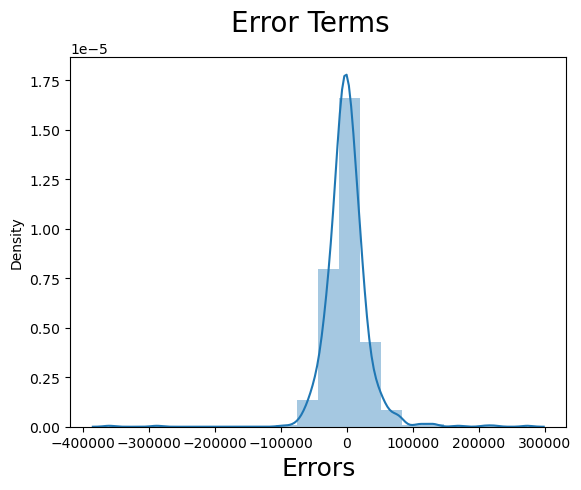

In [446]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [447]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.82

In [448]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1117547098311.343
1094561310.7848608
33084.15498066803


In [449]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

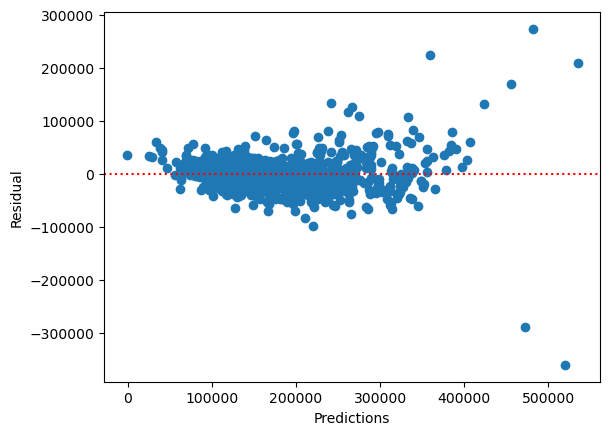

In [450]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [451]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [452]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [453]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [454]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Ext

In [455]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [456]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [457]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     48.09
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.80e-140
Time:                        20:56:46   Log-Likelihood:                -5126.6
No. Observations:                 439   AIC:                         1.037e+04
Df Residuals:                     383   BIC:                         1.059e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.286e+05   3.08e+04      4.174      0.000    6.81e+04    1.89e+05
OverallQual           2.785e+04   2747.134     10.139      0.000    2.25e+04    3.33e+04
BsmtUnfSF            -1.269e+04   1883.141     -6.739      0.000   -1.64e+04   -8988.772
TotalBsmtSF            2.18e+04   4491.012      4.854      0.000     1.3e+04    3.06e+04
1stFlrSF              2.016e+04   3718.164      5.422      0.000    1.29e+04    2.75e+04
2ndFlrSF               2.68e+04   3740.088      7.166      0.000    1.94e+04    3.42e+04
GarageYrBlt           -650.4205   5145.501     -0.126      0.899   -1.08e+04    9466.547
MSSubClass_45         5952.1196   1.59e+04      0.374      0.709   -2.53e+04    3.73e+04
MSSubClass_90        -1.949e+04   1.18e+04     -1.655      0.099   -4.26e+04    3659.772
MSSubClass_120       -2.234e+04   7877.695     -2.835      0.005   -3.78e+04   -6847.035
MSSubClass_160       -3.663e+04   1.08e+04     -3.387      0.001   -5.79e+04   -1.54e+04
MSSubClass_180        1.346e+04    1.9e+04      0.708      0.479   -2.39e+04    5.08e+04
MSSubClass_190       -5654.5156   1.45e+04     -0.391      0.696   -3.41e+04    2.28e+04
MSZoning_FV           3.203e+04   2.59e+04      1.238      0.217   -1.88e+04    8.29e+04
MSZoning_RH           -1.55e+04   2.95e+04     -0.525      0.600   -7.35e+04    4.25e+04
MSZoning_RL           1.154e+04   2.06e+04      0.560      0.576    -2.9e+04    5.21e+04
MSZoning_RM           2474.3239   2.05e+04      0.121      0.904   -3.78e+04    4.27e+04
LotShape_IR3         -2.546e+04   3.15e+04     -0.809      0.419   -8.74e+04    3.64e+04
LotConfig_CulDSac     1.857e+04   6263.830      2.965      0.003    6259.000    3.09e+04
Neighborhood_BrDale   4.188e+04   1.92e+04      2.184      0.030    4169.259    7.96e+04
Neighborhood_ClearCr  1.495e+04   1.17e+04      1.273      0.204   -8141.668    3.81e+04
Neighborhood_Crawfor  2.479e+04   8190.455      3.027      0.003    8685.292    4.09e+04
Neighborhood_NPkVill   1.38e+04    3.2e+04      0.431      0.666   -4.91e+04    7.67e+04
Neighborhood_NoRidge  2.763e+04   1.41e+04      1.966      0.050       1.735    5.53e+04
Neighborhood_NridgHt  7.294e+04   8623.150      8.458      0.000     5.6e+04    8.99e+04
Neighborhood_Somerst -1364.1060   1.44e+04     -0.095      0.925   -2.97e+04    2.69e+04
Neighborhood_StoneBr  7.809e+04   1.07e+04      7.318      0.000    5.71e+04    9.91e+04
Neighborhood_Veenker -1.994e-11   1.41e-11     -1.414      0.158   -4.77e-11    7.78e-12
HouseStyle_1.5Unf     5952.1196   1.59e+04      0.374      0.709   -2.53e+04    3.73e+04
HouseStyle_1Story     1.444e+04   7405.278      1.949      0.052    -124.424     2.9e+04
HouseStyle_2.5Fin     3.522e+04   1.71e+04      2.055      0.041    1520.919    6.89e+04
HouseStyle_SLvl       2.016e+04   9794.180      2.058    

In [458]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Calculate r2 score of Test model

In [459]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

In [460]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

507967506058.00775
1157101380.5421588
34016.19291664132


In [461]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [462]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,MSZoning_RL,85.96
55,GarageType_Attchd,84.47
47,Exterior2nd_MetalSd,37.78
59,GarageType_Detchd,37.78
37,Exterior1st_MetalSd,33.87
50,Exterior2nd_VinylSd,17.29
15,MSZoning_RM,17.13
45,Exterior2nd_HdBoard,14.76
51,Exterior2nd_Wd Sdng,11.89
57,GarageType_BuiltIn,10.69


Text(0, 0.5, 'y_pred')

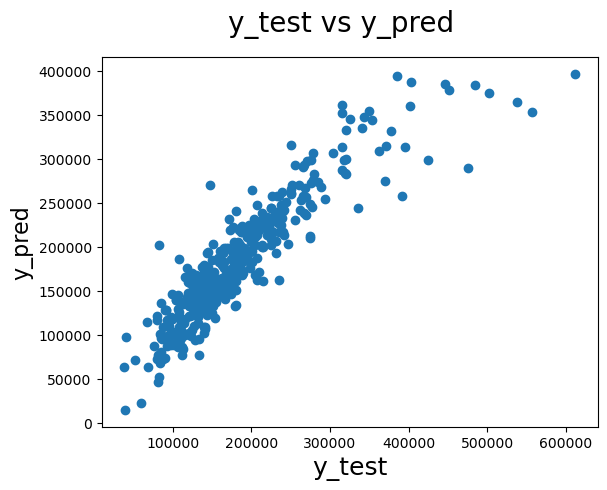

In [463]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [464]:
X_train_new.columns

Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Ext

In [465]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


### Final evalution
- No of Variables = `21` i.e. `OverallQual`,`BsmtUnfSF`, `TotalBsmtSF`,`1stFlrSF`, `2ndFlrSF`, `MSSubClass_90`, `MSSubClass_160`, `MSZoning_RL`, `LotShape_IR3`, `LotConfig_CulDSac`, `Neighborhood_Crawfor` , `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Neighborhood_Veenker`, `Exterior1st_ImStucc`, `Exterior1st_Stucco`, `Exterior2nd_CmentBd` , `Exterior2nd_ImStucc`, `Exterior2nd_VinylSd`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.80`
- r2 score for Test Data set model = `0.82`

In [466]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8248868338316879
0.8202346368254202
1117547098311.343
507967506058.00775
1094561310.7848608
1157101380.5421588


### Ridge Regression

In [467]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [468]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [469]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 30899.23041087  -8130.66903324  10659.33731499  21220.11011576
  23155.54528623   1846.96784526   2162.52673392 -12967.90807877
 -12838.33184296 -18622.69822268   2966.3360435   -7433.10075171
   6658.78999106  -1463.89804595   7778.58191005  -3707.08514635
 -16452.48160351  13312.85022608   -854.26816901  16021.97408549
  18455.16873326    577.45232377  42012.92398957  43802.14917563
  20044.53816903  14661.63462421  16295.89129992   2084.32315182
  12760.31833218  -2566.42261937   1140.21596427    890.80324858
   1087.77469256   1422.59617004  -5105.78148122  -4183.94611745
  -3527.63635284  -1803.47365164    119.51485692  -2778.89433364
 -16363.19864311  -4627.65822513  -3040.67304295   9775.58515011
  12985.75244849   2466.81930775  11240.35680231    846.71831713
      0.            145.84053436  11577.24728011  -1097.64258814
  -8849.62797074   2252.87874353   3286.13726396   3110.53926153
  -4741.89562274   4470.83304569  -4529.37193543  -3213.47133366
  -6509.8030718 ]


In [470]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8161323370157333
0.8158909483466338
1173417040748.6946
520241575793.67334
1149282116.306263
1185060537.115429


## Lasso

In [471]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [472]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [473]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [474]:
lasso.coef_

array([ 29906.71897691,  -8179.52320567,   9532.31714137,  21372.84083513,
        22753.53353183,   1408.38839282,      0.        , -13320.58078098,
       -15812.78737516, -23456.41851844,      0.        ,  -6449.47390783,
            0.        ,     -0.        ,   9594.58411249,     -0.        ,
       -18772.03194676,  12801.94603019,      0.        ,  22210.39331596,
        23447.36908572,      0.        ,  55822.57944527,  55470.83492315,
        32310.78983227,  24592.25249013,  25918.92556804,      0.        ,
        12282.32216919,     -0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,     -0.        ,   -129.68183235,
           -0.        ,     -0.        ,    915.94749221,     -0.        ,
       -17726.87160292,  -4782.89573981,     -0.        ,  11352.63845109,
        14831.68912854,      0.        ,  11365.94311819,     -0.        ,
            0.        ,      0.        ,  12939.61360038,     -0.        ,
        -8227.09894841,  

In [475]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8196313033324517
0.8188549216739185
1151087139805.7847
511866201847.90894
1127411498.3406315
1165982236.5556011


In [476]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.248868e-01,8.161323e-01,8.196313e-01
1,R2 Score (Test),8.202346e-01,8.158909e-01,8.188549e-01
2,RSS (Train),1.117547e+12,1.173417e+12,1.151087e+12
3,RSS (Test),5.079675e+11,5.202416e+11,5.118662e+11
4,MSE (Train),3.308415e+04,3.390106e+04,3.357695e+04
5,MSE (Test),3.401619e+04,3.442471e+04,3.414648e+04


## Lets observe the changes in the coefficients after regularization

In [477]:
betas = pd.DataFrame(index=X.columns)

In [478]:
betas.rows = X.columns

In [479]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [480]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,2.810630e+04,30899.230411,29906.718977
BsmtUnfSF,-8.335912e+03,-8130.669033,-8179.523206
TotalBsmtSF,9.753861e+03,10659.337315,9532.317141
1stFlrSF,2.110835e+04,21220.110116,21372.840835
2ndFlrSF,2.447237e+04,23155.545286,22753.533532
GarageYrBlt,6.362450e+03,1846.967845,1408.388393
MSSubClass_45,-3.705633e+03,2162.526734,0.000000
MSSubClass_90,-1.752489e+04,-12967.908079,-13320.580781
MSSubClass_120,-2.190578e+04,-12838.331843,-15812.787375
MSSubClass_160,-3.321241e+04,-18622.698223,-23456.418518


### Q1: double the value of alpha for both ridge and lasso

In [491]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ -5484.02080467  20779.10457752  33597.33350164   7203.74986261
  -4131.10728512 -22265.70609891   5938.81199741  -2352.2638648
  -8050.76340904 -13215.50091261  15104.15479721  -1152.6685086
   7255.09998325  -9017.48596211 -18946.92868541  12799.75202195
   1389.26423364   6040.60623639  18725.32357936   -858.55999568
  21584.60990353  15180.76699846  -7713.00699277 -44576.59738397
    160.34479365 -28741.19457632  -2314.58736089   3734.96920132
   1882.60476775  -4668.32277322    381.08722523   1244.77228641
  -3037.31221895  -5428.0996931   -2527.08501035  -7735.1717185
  -2984.35312748  -4675.796401     2490.38040326  13580.26674297
  -1446.72998368   8262.78490581   -632.7550642       0.
  -7646.63488437  25746.32044326  -6763.21995584   2040.15695565
   3937.91838393   4986.65821566   5122.18848592 -11809.70436842
  31645.13759275  -9502.75105334 -15061.21608646  -1956.60213115]
0.6564059860904338
0.6779742520376304


#Coeff values are increasing as alpha increases.r2_score of train data dropped from .81 to 0.65

In [482]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 31084.57160627  -7980.34004279   9841.45459181  21322.30898633
  22203.22642696   2119.40548466      0.          -9690.73790149
 -10785.65772151 -18730.10871603      0.          -1903.60066359
      0.             -0.           8574.45482608  -2195.49263652
  -7720.89995858  12042.50925794     -0.          16636.47264472
  17761.1073174       0.          51821.7412369   49615.72359347
  26874.38876491  11398.2777638   15827.92764052      0.
  11126.47286015     -0.              0.              0.
      0.              0.             -0.             -0.
     -0.             -0.              0.             -0.
 -13160.81495289  -3571.61816099     -0.           4046.25187339
  12414.82311654     -0.              0.             -0.
      0.              0.          11981.32507329     -0.
  -5190.0743264       0.              0.           1325.25715308
     -0.              0.             -0.          -4130.91809148
  -5234.54833786]
0.8141819496065005
0.811359483921801


#As we increased the alpha value more features were removed from the model. r2score dropped a bit in both test and train data

### Q3: Drop the Top 5 features and rebuild lasso
Top 5 features are `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `2ndFlrSF`, `OverallQual`, `Neighborhood_Veenker`

In [483]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [484]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [485]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [486]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [487]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [488]:
lasso.coef_

array([ -5149.09328367,  20101.88873322,  34972.30273815,   4669.07618934,
           -0.        , -21263.1161044 ,   1574.61535978,     -0.        ,
           -0.        ,  -4250.21967028,      0.        ,     -0.        ,
          196.43678066, -13039.38834524,  -5924.27558408,   9148.29686615,
            0.        ,      0.        ,  13246.17937971,     -0.        ,
        26858.86808221,   4190.69829611,     -0.        , -45167.28878629,
           -0.        , -31120.86144104,     -0.        ,      0.        ,
            0.        ,     -0.        ,      0.        ,      0.        ,
           -0.        ,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,     -0.        ,      0.        ,   9366.40051638,
            0.        ,      0.        ,     -0.        ,      0.        ,
        -3213.40108605,  28454.35043797,  -4686.80486081,      0.        ,
            0.        ,      0.        ,  17194.98878983,     -0.        ,
        46468.74164914,  

In [489]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6451502011923596
0.6660980206574726


#After dropping the top 5 features model r2 score is .64 for Train and .65 for Test.

In [490]:
X_train_new.columns

Index(['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'Foundation

#Next top 5 features after drooping 5 main predictors BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt', 'MSSubClass_45'